<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/01-Health/Nb_01_Hlth_data_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df1 = df.rename(
    columns = {'cp':'chest_pain_type',
               'age': 'age',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia',
               'target': 'target'},
    errors="raise")

In [ ]:
df1['target'].unique()

array([1, 0])

In [ ]:
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
target = ['target']

In [ ]:
df1[num_feats]

,age,cholesterol,resting_blood_pressure,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,233,145,150,2.3,0
1,37,250,130,187,3.5,0
2,41,204,130,172,1.4,0
3,56,236,120,178,0.8,0
4,57,354,120,163,0.6,0
...,...,...,...,...,...,...
298,57,241,140,123,0.2,0
299,45,264,110,132,1.2,0
300,68,193,144,141,3.4,2
301,57,131,130,115,1.2,1


In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df1[num_feats]
y = df1['target']

mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values(by='MI', ascending=False)
print(mi_df)

##########  Higher MI → feature provides more information about the target

                   Feature        MI
1              cholesterol  0.086198
4            st_depression  0.085152
3  max_heart_rate_achieved  0.080720
5        num_major_vessels  0.054280
0                      age  0.000000
2   resting_blood_pressure  0.000000


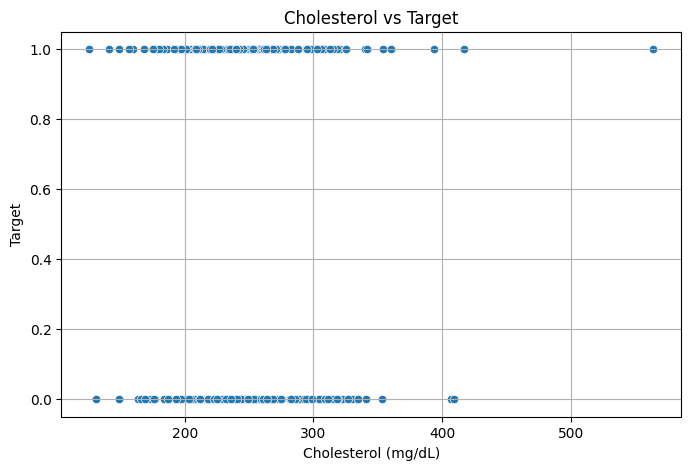

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Cement vs Concrete compressive strength
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='cholesterol', y='target')
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Target")
plt.title("Cholesterol vs Target")
plt.grid(True)
plt.show()

In [ ]:
num_bins = 6
features = df1
for feature in features:
    # Define bins
    bins = np.linspace(df1[feature].min(), df1[feature].max(), num_bins)

    # Assign samples to bins
    df['bin'] = pd.cut(df1[feature], bins)

/tmp/ipython-input-1394682276.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_target_per_bin = df1.groupby('bin')['target'].mean()


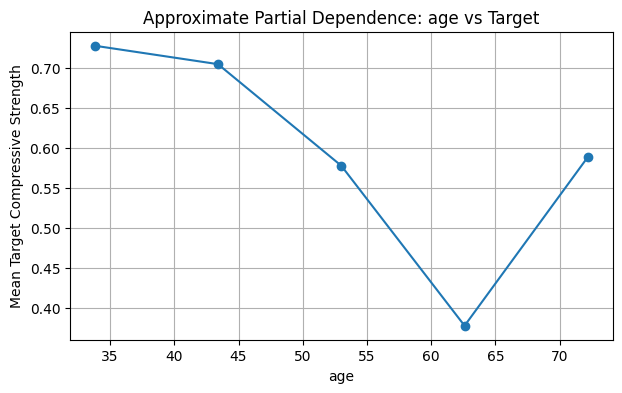

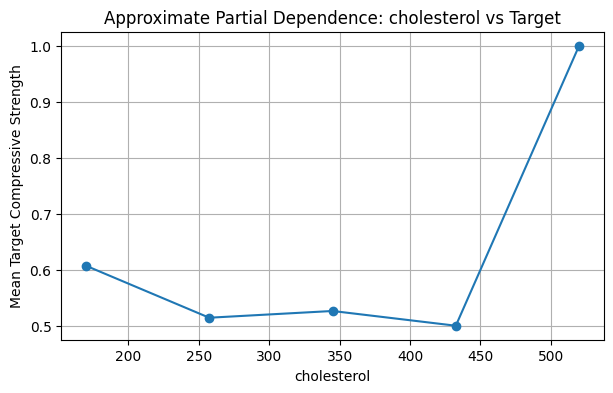

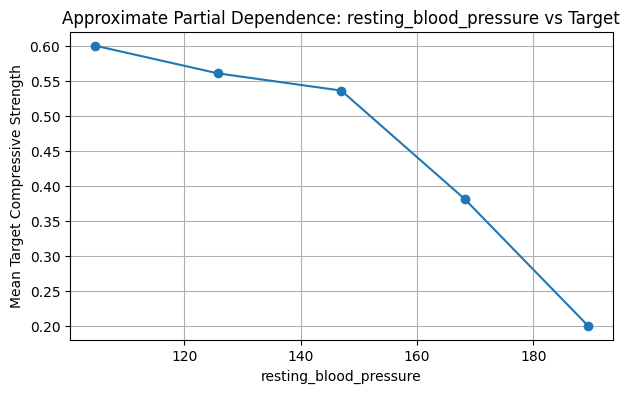

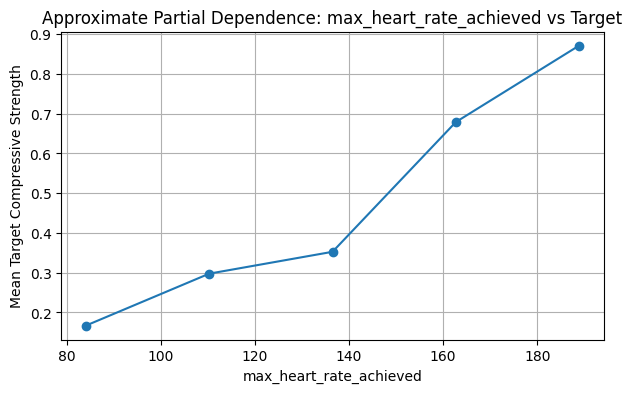

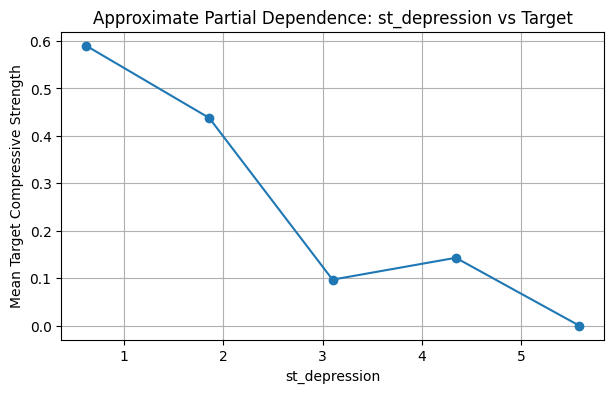

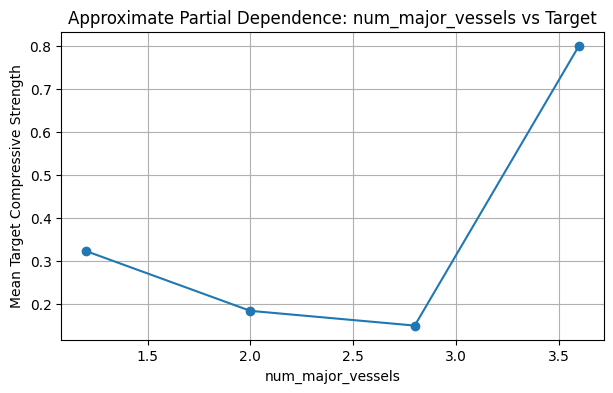

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List all features except the target
features = X

# Number of bins
num_bins = 6

# Loop through each feature
for feature in features:
    # Define bins
    bins = np.linspace(df1[feature].min(), df1[feature].max(), num_bins)

    # Assign samples to bins
    df1['bin'] = pd.cut(df1[feature], bins)

    # Compute mean target per bin
    mean_target_per_bin = df1.groupby('bin')['target'].mean()
    bin_centers = [interval.mid for interval in mean_target_per_bin.index]

    # Plot
    plt.figure(figsize=(7,4))
    plt.plot(bin_centers, mean_target_per_bin.values, marker='o', linestyle='-')
    plt.xlabel(feature)
    plt.ylabel("Mean Target Compressive Strength")
    plt.title(f"Approximate Partial Dependence: {feature} vs Target")
    plt.grid(True)
    plt.show()

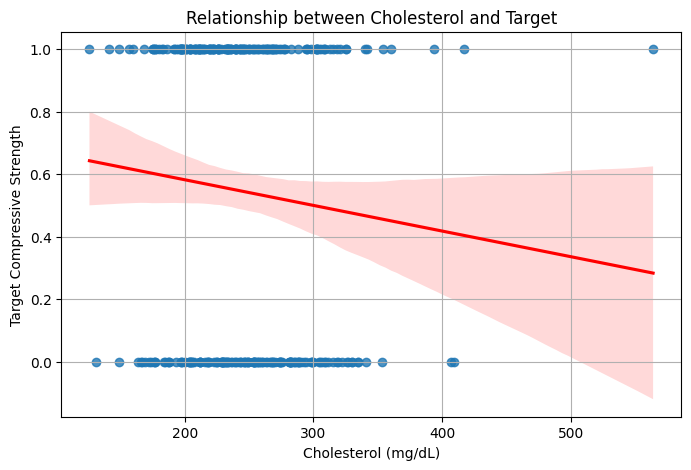

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=df1,
    x='cholesterol',
    y='target',
    line_kws={"color": "red"}
)

plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Target Compressive Strength")
plt.title("Relationship between Cholesterol and Target")
plt.grid(True)
plt.show()

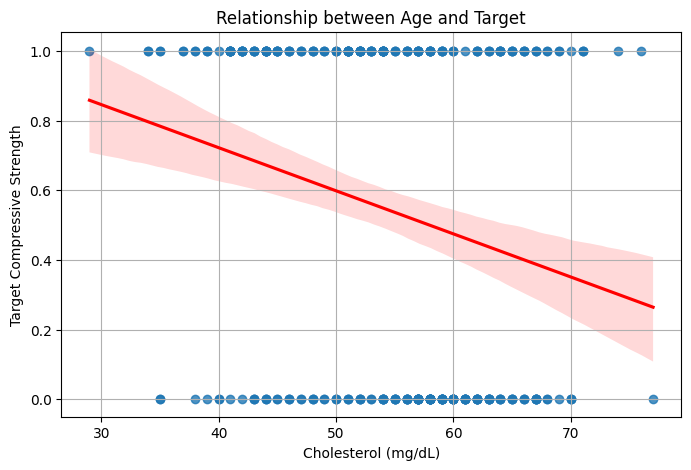

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=df1,
    x='age',
    y='target',
    line_kws={"color": "red"}
)

plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Target Compressive Strength")
plt.title("Relationship between Age and Target")
plt.grid(True)
plt.show()

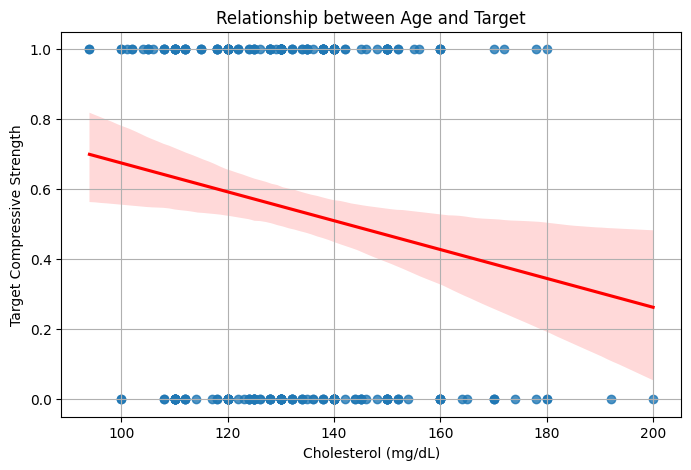

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=df1,
    x='resting_blood_pressure',
    y='target',
    line_kws={"color": "red"}
)

plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Target Compressive Strength")
plt.title("Relationship between Age and Target")
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')